In [1]:
import numpy as np
import pandas as pd
import itertools

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Define Classifiers
knn_5_clf = KNeighborsClassifier(n_neighbors=5)
knn_10_clf = KNeighborsClassifier(n_neighbors=10)
knn_20_clf = KNeighborsClassifier(n_neighbors=20)
knn_50_clf = KNeighborsClassifier(n_neighbors=50)
svm_clf = svm.SVC(kernel='linear', max_iter=1000000, C=0.01, tol=0.0001)
rf_clf = RandomForestClassifier(n_estimators=50, criterion='gini', random_state=1000)

def is_positive(row):
    if row > 0:
        return 1
    else:
        return 0

def plot_confusion_matrix(cm, classes,
                      normalize=True,
                      title='Confusion matrix',
                      cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        cm = cm

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Profitable Value')
    plt.xlabel('Predicted Profitable Value')
    plt.tight_layout()
    
def fit_test_and_plot(X_train, X_test, Y_train, Y_test, model, model_name, title):
    model.fit(X_train, Y_train)
    train_predicted_labels = model.predict(X_train)
    test_predicted_labels = model.predict(X_test)

    training_accuracy = accuracy_score(Y_train, train_predicted_labels)
    testing_accuracy = accuracy_score(Y_test, test_predicted_labels)

    print model_name + " Training accuracy: " + str(training_accuracy)
    print model_name + " Testing accuracy: " + str(testing_accuracy)

    #compute confusion matrix
    class_names = ["Not-Profitable", "Profitable"]
    cnf_matrix = confusion_matrix(Y_test, test_predicted_labels)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure()
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title=title)
    plt.show()

In [16]:
training_data = pd.read_csv("../Data/outTrain.tsv", sep="\t")
testing_data = pd.read_csv("../Data/outTest.tsv", sep="\t")

training_profit = training_data["Domestic Total Gross"] - training_data["Production Budget"]
testing_profit = testing_data["Domestic Total Gross"] - testing_data["Production Budget"]

#Regression Stuff:
regression_training_features = training_data[["Production Budget", "actorAR", "directorAR", "productionAR", "distributionAR"]]
regression_testing_features = testing_data[["Production Budget", "actorAR", "directorAR", "productionAR", "distributionAR"]]
regression_training_results = training_data[["Domestic Total Gross"]]
regression_testing_results = testing_data[["Domestic Total Gross"]]

In [3]:
training_labels = training_profit.apply(is_positive)
testing_labels = testing_profit.apply(is_positive)

training_labels.value_counts()
testing_labels.value_counts()

0    176
1    156
dtype: int64

## Predictions With All Numeric Features

In [4]:
training_data = training_data[["year", "min_age", "runtime(min)", "metacriticRating", "YearReleased", "MonthReleased", "viewCount", "commentCount", "likeCount", "dislikeCount", "Production Budget", "polarity_confidence", "subjectivity_confidence", "actorAR", "directorAR", "languageAR", "countryAR", "genreAR", "ratingAR", "productionAR", "distributionAR" ]]
testing_data = testing_data[["year", "min_age", "runtime(min)", "metacriticRating", "YearReleased", "MonthReleased", "viewCount", "commentCount", "likeCount", "dislikeCount", "Production Budget", "polarity_confidence", "subjectivity_confidence", "actorAR", "directorAR", "languageAR", "countryAR", "genreAR", "ratingAR", "productionAR", "distributionAR" ]]

training_data = training_data.fillna(value=0)
testing_data = testing_data.fillna(value=0)


### KNN with K = 5

5 KNN Training accuracy: 0.916
5 KNN Testing accuracy: 0.58734939759


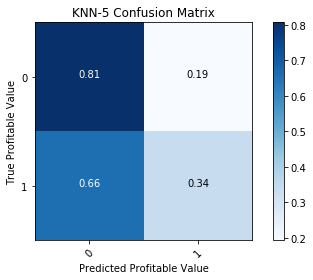

In [5]:
fit_test_and_plot(training_data, testing_data, training_labels, testing_labels, knn_5_clf, "5 KNN", 'KNN-5 Confusion Matrix')



### KNN with K = 10

10 KNN Training accuracy: 0.894
10 KNN Testing accuracy: 0.617469879518


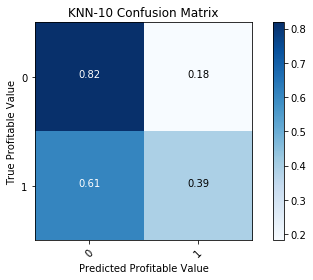

In [6]:
fit_test_and_plot(training_data, testing_data, training_labels, testing_labels, knn_10_clf, "10 KNN", 'KNN-10 Confusion Matrix')


### KNN with K = 20

20 KNN Training accuracy: 0.893
20 KNN Testing accuracy: 0.596385542169


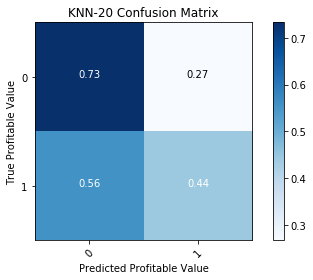

In [7]:
fit_test_and_plot(training_data, testing_data, training_labels, testing_labels, knn_20_clf, "20 KNN", 'KNN-20 Confusion Matrix')


### KNN with K = 50

50 KNN Training accuracy: 0.883
50 KNN Testing accuracy: 0.614457831325


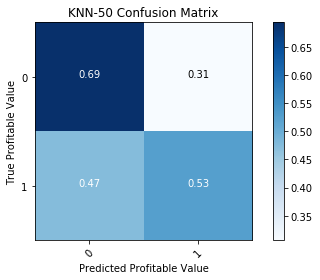

In [8]:
fit_test_and_plot(training_data, testing_data, training_labels, testing_labels, knn_50_clf, "50 KNN", 'KNN-50 Confusion Matrix')


### Linear SVM

/Users/Stefan/miniconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Linear SVM Training accuracy: 0.789
Linear SVM Testing accuracy: 0.578313253012


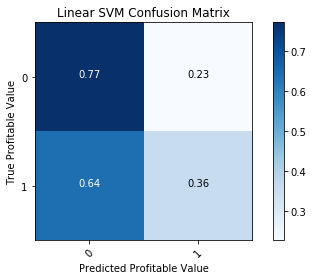

In [9]:
fit_test_and_plot(training_data, testing_data, training_labels, testing_labels, svm_clf, "Linear SVM", 'Linear SVM Confusion Matrix')


### Random Forest

Random Forest Training accuracy: 1.0
Random Forest Testing accuracy: 0.605421686747


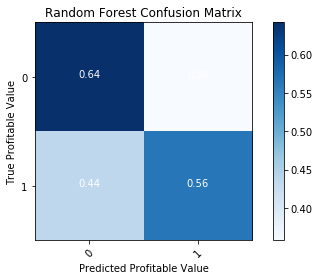

In [10]:
fit_test_and_plot(training_data, testing_data, training_labels, testing_labels, rf_clf, "Random Forest", 'Random Forest Confusion Matrix')


# Predictions Without Our Features

In [11]:
training_data_common_feaures = training_data[["min_age", "runtime(min)", "metacriticRating", "YearReleased", "MonthReleased", "Production Budget"]]
testing_data_common_features = testing_data[["min_age", "runtime(min)", "metacriticRating", "YearReleased", "MonthReleased", "Production Budget"]]

KNN Common Features Training accuracy: 0.695
KNN Common Features Testing accuracy: 0.551204819277


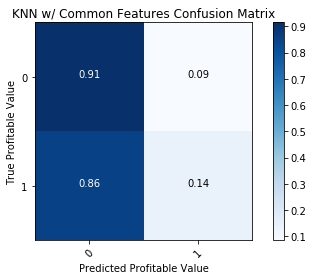

In [12]:
fit_test_and_plot(training_data_common_feaures, testing_data_common_features, training_labels, testing_labels, knn_5_clf, "KNN Common Features", 'KNN w/ Common Features Confusion Matrix')


Linear SVM Common Features Training accuracy: 0.495
Linear SVM Common Features Testing accuracy: 0.530120481928


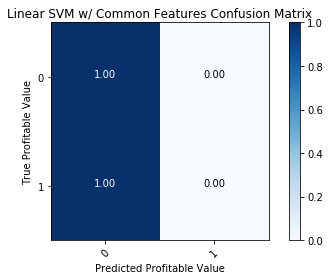

In [13]:
fit_test_and_plot(training_data_common_feaures, testing_data_common_features, training_labels, testing_labels, svm_clf, "Linear SVM Common Features", 'Linear SVM w/ Common Features Confusion Matrix')


### Linear Regression
#-produciton budget, actorAR, directorAR, productionAR, distributionAR; calculate R-squared

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(regression_training_features, regression_training_results)

training_set_predictions = lin_reg.predict(regression_training_features)
testing_set_predictions = lin_reg.predict(regression_testing_features)

training_r2_score = r2_score(regression_training_results, training_set_predictions)
testing_r2_score = r2_score(regression_testing_results, testing_set_predictions)

training_mse = mean_squared_error(regression_training_results, training_set_predictions)
testing_mse = mean_squared_error(regression_testing_results, testing_set_predictions)

print "Training set r^2 score: " + str(training_r2_score)
print "Testing set r^2 score: " + str(testing_r2_score)
print
print "Training set mean squared error: " + str(training_mse)
print "Testing set mean squared error: " + str(testing_mse)



Training set r^2 score: 0.871935208716
Testing set r^2 score: 0.269426366971

Training set mean squared error: 1.73422596473e+14
Testing set mean squared error: 8.77981766631e+15
